###  K Means  & Hierarchical Clustering

**Overview**<br>
HELP International , an international humanitarian NGO is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.  It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
This assignment aims to decide how to use the money raised i.e; $ 10 million  strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

Task is to cluster the countries as per the various factors.

The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Exploratory Data Analysis
4. Prepare the data for modelling
5. Cluster tendency check
6. Modelling using KMeans algo
7. Cluster Profiling of the clusters formed above
8. Modelling using Hierarchical algo
9. Cluster Profiling of the clusters formed above
10. Final Analysis

# Step 1. Read and Understand the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [2]:
#Read the dataset
country_df= pd.read_csv("Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country_df.shape

(167, 10)

In [4]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#  Step 2. Clean the Data

### Missing value check

In [6]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


The dataframe has no missing values

In [7]:
# exports, imports and health are given as %age of gdpp. Converting these to absolute values

country_df['Exports']= (country_df['exports'] * country_df['gdpp'])/100
country_df['Imports']= (country_df['imports'] * country_df['gdpp'])/100
country_df['Health_expen']= (country_df['health'] * country_df['gdpp'])/100
country_df.drop(['exports','imports', 'health'], axis=1, inplace=True)
country_df.head()


,country,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Imports,Health_expen
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600


# Step 3. Exploratory Data Analysis

### Univariate Analysis

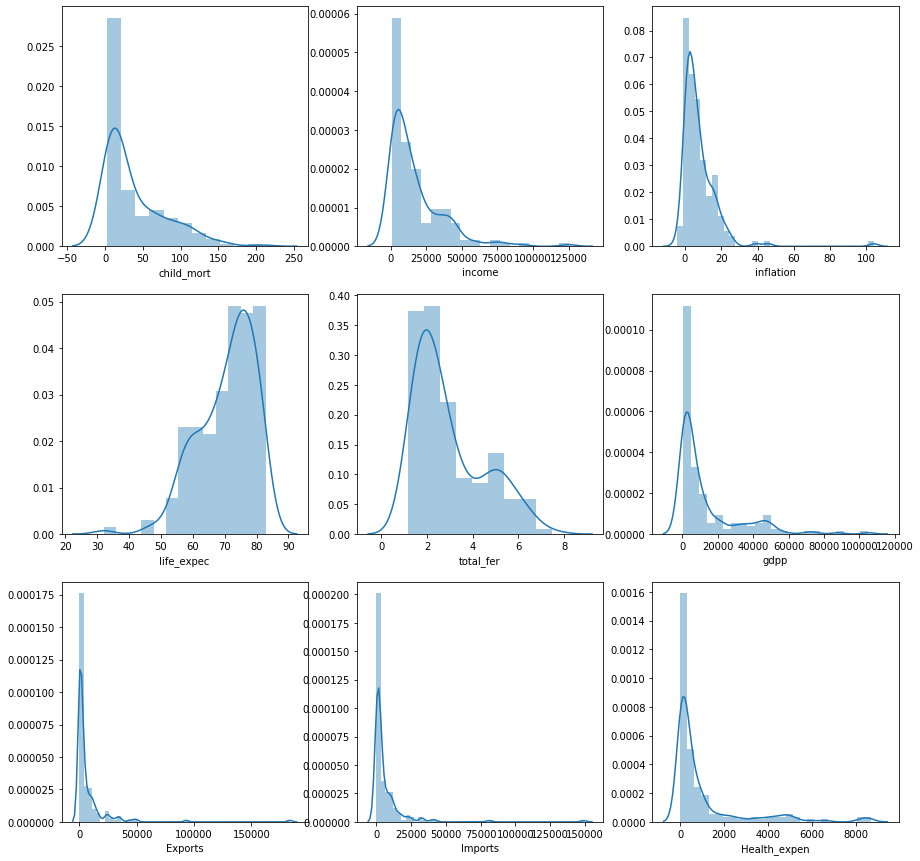

In [8]:
#Plotting the density distribution of each variable
plt.figure(figsize = (15, 15))
feature = ['child_mort', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'Exports', 'Imports', 'Health_expen']
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country_df[i[1]])

Following inferences can be drawn:<br>
`child_mort`, `income`, `inflation`, `gdpp`: have most of the data points with very less values. It is a sort of positively skewed. with few outliers on the higher side.<br>
`life_expec`: has outliers on the lower side, that is, it is negatively skewed. Also, it has sort of two peaks in the curve depicting that it could be a discriminating factor for clustering.<br>
`total_fer`: has two peaks in the curve . It may be one of the differentiating factor while deciding on clusters.<br>
`Exports`, `Imports`, `Health_expen` : have similar trend with few high value outliers<br>

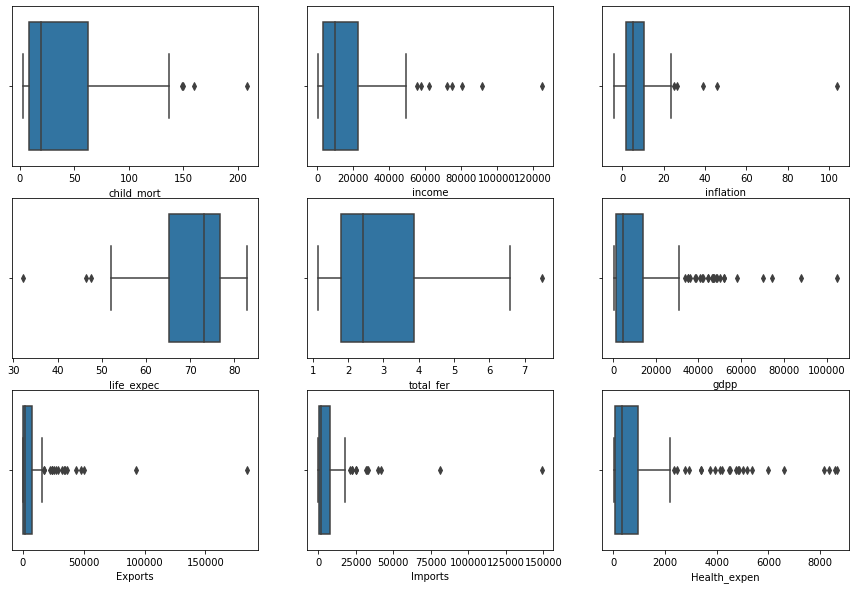

In [9]:
#Boxplot of each variable to look at the outliers in more detail
plt.figure(figsize = (15, 10))

for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country_df[i[1]])

Similar trend of data distribution is shown by the boxplots as well.

We need to choose the countries that are in the direst need of aid. <br> Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country.
`We will have a look on the lowest 10 countries for each factor.`

                      country  child_mort
66                      Haiti       208.0
132              Sierra Leone       160.0
32                       Chad       150.0
31   Central African Republic       149.0
97                       Mali       137.0
113                   Nigeria       130.0
112                     Niger       123.0
3                      Angola       119.0
25               Burkina Faso       116.0
37           Congo, Dem. Rep.       116.0


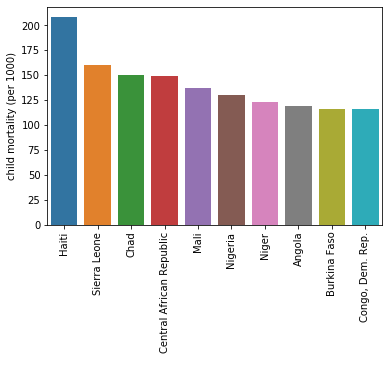

In [10]:
# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
worst_child_mort= country_df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
print(worst_child_mort)
sns.barplot(x='country', y='child_mort', data= worst_child_mort)
plt.xlabel(" ")
plt.xticks(rotation =90)
plt.ylabel("child mortality (per 1000)")
plt.show()

In [11]:
#Exports: Absolute value of Exports of goods and services per capita
worst_exports= country_df[['country','Exports']].sort_values('Exports',ascending = False).tail(10)
worst_exports=worst_exports.sort_values('Exports')
worst_exports

,country,Exports
107,Myanmar,1.07692
26,Burundi,20.60520
50,Eritrea,23.08780
31,Central African Republic,52.62800
0,Afghanistan,55.30000
109,Nepal,56.71360
88,Liberia,62.45700
132,Sierra Leone,67.03200
126,Rwanda,67.56000
112,Niger,77.25600


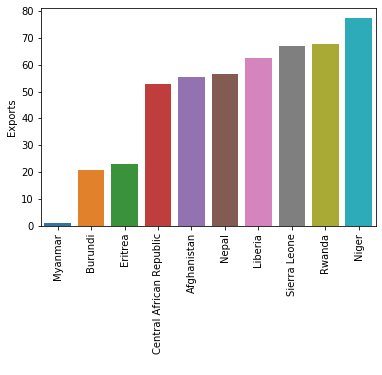

In [12]:
sns.barplot(x='country', y='Exports', data= worst_exports)
plt.xlabel(" ")
plt.xticks(rotation =90)
plt.ylabel("Exports")
plt.show()

In [13]:
# health : Total health spending per capita. Given as %age of GDP per capita
worst_health= country_df[['country','Health_expen']].sort_values('Health_expen',ascending = False).tail(10)
worst_health=worst_health.sort_values('Health_expen')
worst_health

,country,Health_expen
50,Eritrea,12.8212
93,Madagascar,15.5701
31,Central African Republic,17.7508
112,Niger,17.9568
107,Myanmar,19.4636
106,Mozambique,21.8299
116,Pakistan,22.8800
37,"Congo, Dem. Rep.",26.4194
12,Bangladesh,26.6816
26,Burundi,26.7960


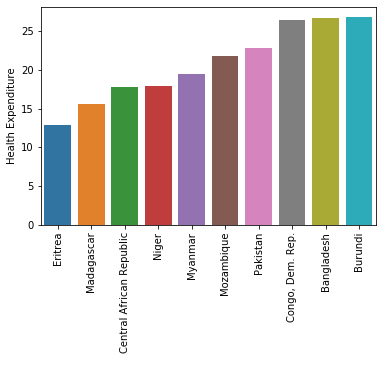

In [14]:
sns.barplot(x='country', y='Health_expen', data= worst_health)
plt.xlabel(" ")
plt.xticks(rotation =90)
plt.ylabel("Health Expenditure")
plt.show()

In [15]:
#inflation: The measurement of the annual growth rate of the Total GDP
worst_inflation= country_df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
worst_inflation


,country,inflation
113,Nigeria,104.0
163,Venezuela,45.9
103,Mongolia,39.2
149,Timor-Leste,26.5
49,Equatorial Guinea,24.9
165,Yemen,23.6
140,Sri Lanka,22.8
3,Angola,22.4
5,Argentina,20.9
37,"Congo, Dem. Rep.",20.8


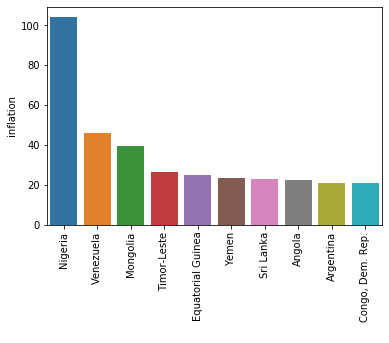

In [16]:
sns.barplot(x='country', y='inflation', data= worst_inflation)
plt.xlabel(" ")
plt.xticks(rotation =90)
plt.ylabel("inflation")
plt.show()

In [17]:
#income: Net income per person
worst_income= country_df[['country','income']].sort_values('income',ascending = False).tail(10)
worst_income= worst_income.sort_values('income')
worst_income


,country,income
37,"Congo, Dem. Rep.",609
88,Liberia,700
26,Burundi,764
112,Niger,814
31,Central African Republic,888
106,Mozambique,918
94,Malawi,1030
63,Guinea,1190
150,Togo,1210
132,Sierra Leone,1220


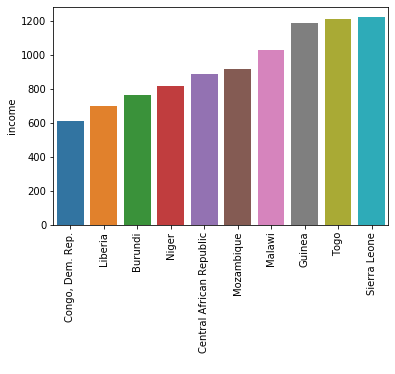

In [18]:
sns.barplot(x='country', y='income', data= worst_income)
plt.xlabel(" ")
plt.xticks(rotation =90)
plt.ylabel("income")
plt.show()

In [19]:
#life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same
worst_life_expec= country_df[['country','life_expec']].sort_values('life_expec',ascending = False).tail(10)
worst_life_expec= worst_life_expec.sort_values('life_expec')
worst_life_expec


,country,life_expec
66,Haiti,32.1
87,Lesotho,46.5
31,Central African Republic,47.5
166,Zambia,52.0
94,Malawi,53.1
137,South Africa,54.3
106,Mozambique,54.5
132,Sierra Leone,55.0
64,Guinea-Bissau,55.6
0,Afghanistan,56.2


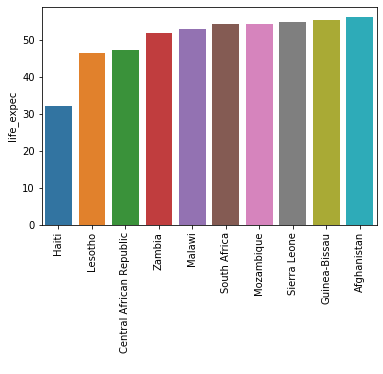

In [20]:
sns.barplot(x='country', y='life_expec', data= worst_life_expec)
plt.xlabel(" ")
plt.xticks(rotation =90)
plt.ylabel("life_expec")
plt.show()

In [21]:
#total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.
worst_total_fer= country_df[['country','total_fer']].sort_values('total_fer',ascending = False).head(10)
worst_total_fer

,country,total_fer
112,Niger,7.49
32,Chad,6.59
97,Mali,6.55
37,"Congo, Dem. Rep.",6.54
26,Burundi,6.26
149,Timor-Leste,6.23
3,Angola,6.16
155,Uganda,6.15
25,Burkina Faso,5.87
113,Nigeria,5.84


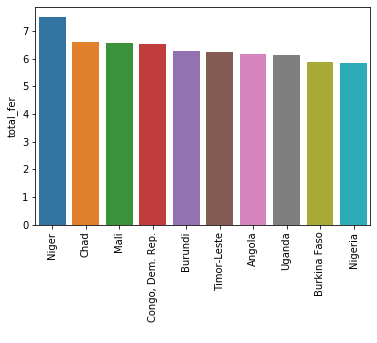

In [22]:
sns.barplot(x='country', y='total_fer', data= worst_total_fer)
plt.xlabel(" ")
plt.xticks(rotation =90)
plt.ylabel("total_fer")
plt.show()

In [23]:
#gdpp :The GDP per capita. Calculated as the Total GDP divided by the total population.
worst_gdpp= country_df[['country','gdpp']].sort_values('gdpp', ascending =True).head(10)
worst_gdpp= worst_gdpp.sort_values('gdpp', ascending= True)
worst_gdpp

,country,gdpp
26,Burundi,231
88,Liberia,327
37,"Congo, Dem. Rep.",334
112,Niger,348
132,Sierra Leone,399
93,Madagascar,413
106,Mozambique,419
31,Central African Republic,446
94,Malawi,459
50,Eritrea,482


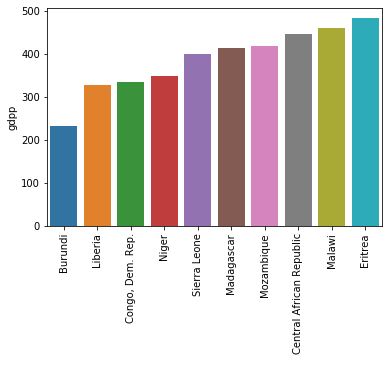

In [24]:
sns.barplot(x='country', y='gdpp', data= worst_gdpp)
plt.xlabel(" ")
plt.xticks(rotation =90)
plt.ylabel("gdpp")
plt.show()

###  Bivariate Analysis:  <br>
<br>
Visualizing numeric variables

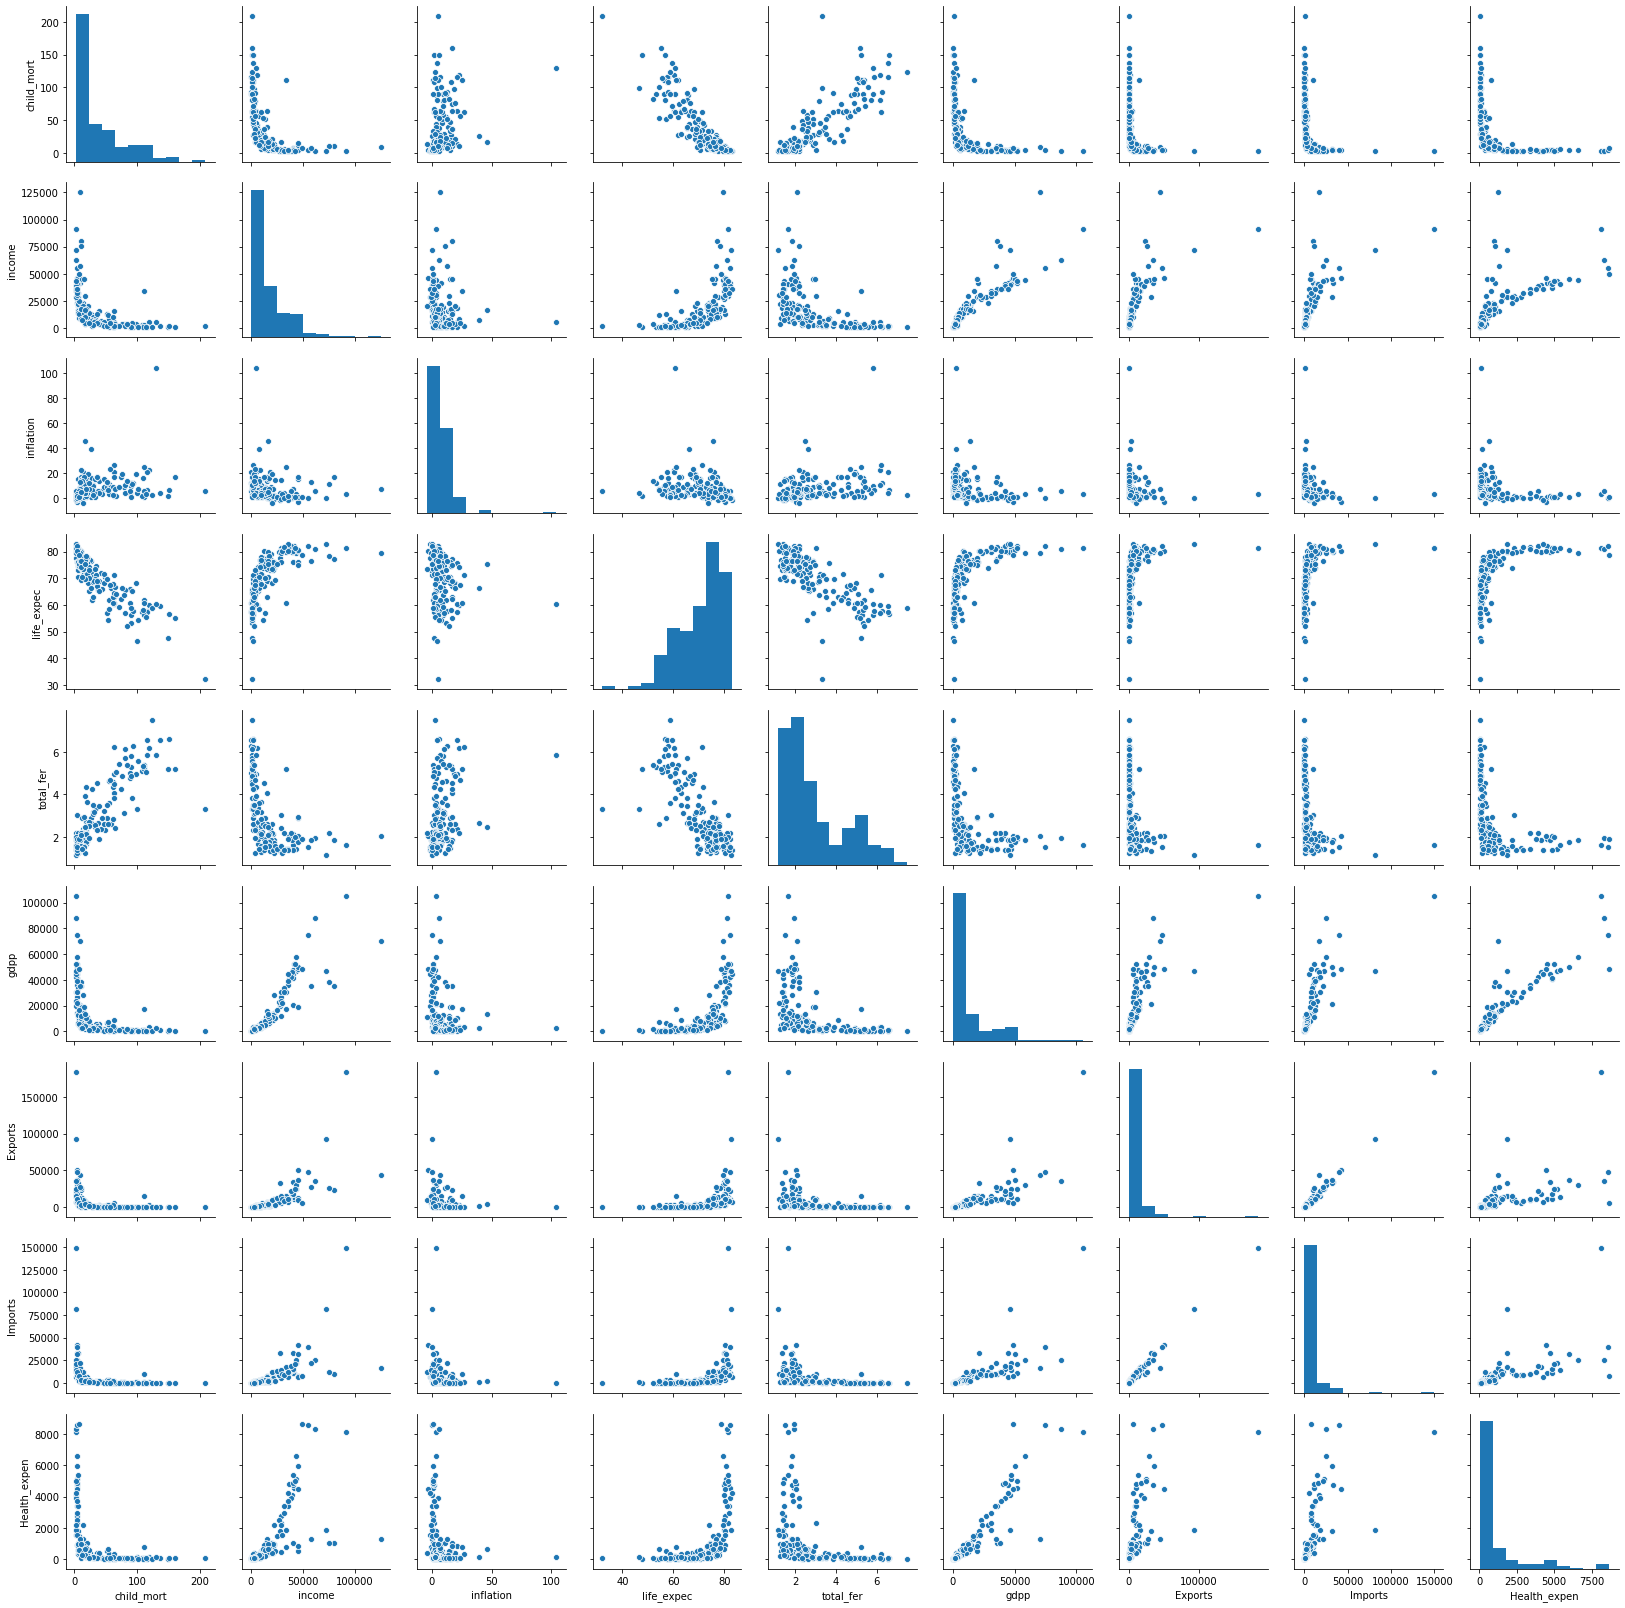

In [25]:
#numeric_cols= country_df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]
sns.pairplot(country_df[feature])
plt.show()

In [26]:
def fun_heatmap_plot(corr_matrix):
    sns.set(font_scale=0.7)
    plt.figure(figsize=(10, 7))
    ax = sns.heatmap(corr_matrix,cmap=sns.diverging_palette(20, 120, n=100),linewidths=.1,square=True, annot=True)
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=90,horizontalalignment='right')
    bottom, top=ax.get_ylim()
    ax.set_ylim(bottom+0.5, top-0.5);

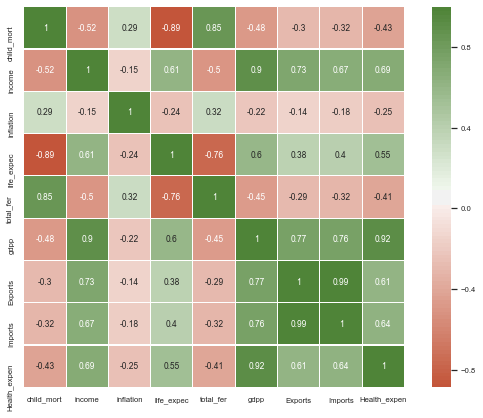

In [27]:
fun_heatmap_plot(country_df[feature].corr())

Highly correlated columns can be noted for understanding the data. Multicollinearity wont impact the clustering in any way. So we shall leave this as it is. 

# Step 4. Prepare the data for modelling

In [28]:
# Before manipulating data, we will save one copy of orignal data.
country_help = country_df.copy()
country_help.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Imports,Health_expen
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600


### Outlier Treatment: Capping 

In [29]:
p_up_mort= country_df.child_mort.quantile(0.98)
country_df.child_mort[country_df.child_mort >= p_up_mort] = p_up_mort

p_up_income= country_df.income.quantile(0.95)
country_df.income[country_df.income >= p_up_income] = p_up_income

p_up_inflation= country_df.inflation.quantile(0.95)
country_df.inflation[country_df.inflation >= p_up_inflation] = p_up_inflation

p_low_life= country_df.life_expec.quantile(0.05)
country_df.life_expec[country_df.life_expec <= p_low_life] = p_low_life


p_up_fer= country_df.total_fer.quantile(0.95)
country_df.total_fer[country_df.total_fer >= p_up_fer] = p_up_fer

p_up_gdpp= country_df.gdpp.quantile(0.95)
country_df.gdpp[country_df.gdpp >= p_up_gdpp] = p_up_gdpp

p_up_exp = country_df.Exports.quantile(0.95)
country_df.Exports[country_df.Exports >= p_up_exp] = p_up_exp

p_up_imp= country_df.Imports.quantile(0.95)
country_df.Imports[country_df.Imports >= p_up_imp] = p_up_imp


p_up_health= country_df.Health_expen.quantile(0.95)
country_df.Health_expen[country_df.Health_expen >= p_up_health] = p_up_health




C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarnin

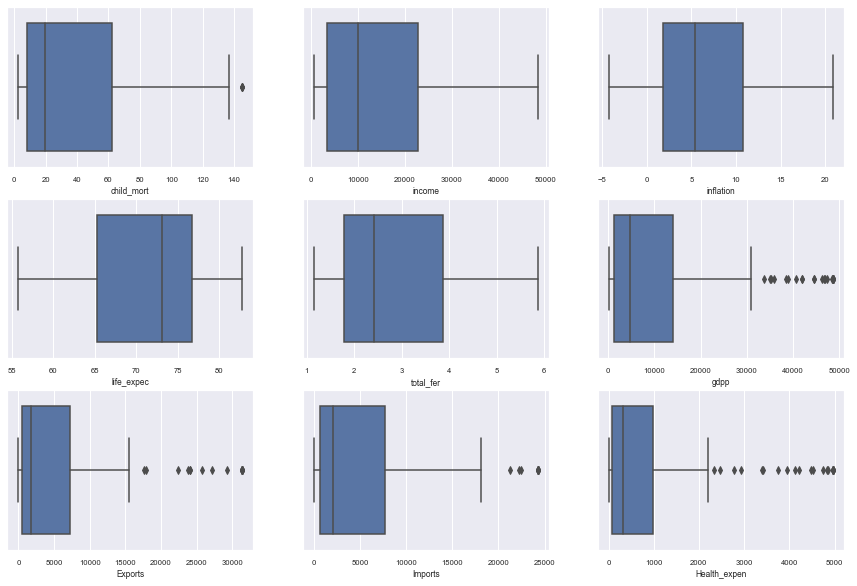

In [30]:
#Boxplot of each variable after capping
plt.figure(figsize = (15, 10))

for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country_df[i[1]])

In [31]:
country_df1= country_df.drop('country', axis=1)
country_df1.head()
#country_df1.drop('cluster_id', axis=1, inplace=True)

,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Imports,Health_expen
0,90.2,1610.0,9.44,56.2,5.820,553,55.30,248.297,41.9174
1,16.6,9930.0,4.49,76.3,1.650,4090,1145.20,1987.740,267.8950
2,27.3,12900.0,16.10,76.5,2.890,4460,1712.64,1400.440,185.9820
3,119.0,5900.0,20.87,60.1,5.861,3530,2199.19,1514.370,100.6050
4,10.3,19100.0,1.44,76.8,2.130,12200,5551.00,7185.800,735.6600


### Feature Scaling

In [32]:
# instantiate
scaler = StandardScaler()

# fit_transform
country_df_scaled = scaler.fit_transform(country_df1)
country_df_scaled.shape

(167, 9)

In [33]:
country_df_scaled= pd.DataFrame(country_df_scaled)
country_df_scaled.columns=['child_mort', 'income', 'inflation', 'life_expec','total_fer', 'gdpp', 'Exports', 'Imports', 'Health_expen']
country_df_scaled.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Imports,Health_expen
0,1.362987,-0.958349,0.394438,-1.819049,2.016421,-0.757362,-0.669581,-0.732729,-0.629435
1,-0.549720,-0.394006,-0.383226,0.674398,-0.880535,-0.523321,-0.542172,-0.472182,-0.473489
2,-0.271649,-0.192552,1.440750,0.699208,-0.019090,-0.498838,-0.475838,-0.560152,-0.530017
3,2.111438,-0.667360,2.190136,-1.335246,2.044904,-0.560376,-0.418960,-0.543087,-0.588935
4,-0.713443,0.227992,-0.862393,0.736424,-0.547072,0.013312,-0.027134,0.306422,-0.150685


# Step 5: Cluster tendency Check
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [34]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(country_df_scaled)

0.8490458059337472

Such high value of hopskin statistic depicts high tendency to form clusters.

# Step 6: Modeling using KMeans

### Intially with random choice of `k`

In [36]:
#choosing some arbitrary k for KMeans clustering

kmeans= KMeans(n_clusters=5, max_iter=50, random_state=50)
kmeans.fit(country_df_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [37]:
#Let's look at the labels assigned
kmeans.labels_

array([2, 0, 1, 2, 0, 1, 1, 4, 3, 1, 4, 4, 1, 0, 1, 3, 0, 2, 1, 1, 0, 1,
       0, 4, 0, 2, 2, 1, 2, 4, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 4, 4,
       3, 0, 1, 1, 0, 2, 2, 0, 1, 3, 4, 2, 2, 1, 3, 2, 4, 0, 1, 2, 2, 1,
       2, 0, 3, 1, 1, 1, 1, 3, 4, 4, 1, 4, 1, 1, 2, 2, 4, 1, 2, 0, 0, 2,
       2, 1, 0, 3, 0, 2, 2, 0, 0, 2, 3, 2, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1,
       3, 4, 2, 2, 3, 4, 2, 0, 1, 0, 1, 0, 4, 3, 0, 1, 2, 1, 4, 2, 0, 0,
       2, 3, 4, 4, 1, 1, 4, 4, 1, 0, 2, 1, 3, 3, 1, 2, 0, 2, 2, 1, 0, 0,
       1, 2, 1, 3, 4, 4, 0, 1, 1, 1, 1, 2, 2])

## Finding the Optimal Number of Clusters

### SSD

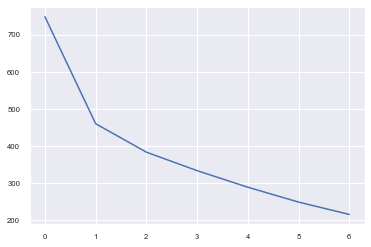

In [38]:
#elbow-curve/SSD
ssd=[]
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df_scaled)
    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

Elbow is formed as k=3 in the above curve. In order to make the conclusion more robust, let's do Silhouette Analysis as well.

### Silhouette Analysis
$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [39]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.4849667351724645
For n_clusters=3, the silhouette score is 0.4165587220903118
For n_clusters=4, the silhouette score is 0.38417540964710456
For n_clusters=5, the silhouette score is 0.29436992198675577
For n_clusters=6, the silhouette score is 0.30952763314331194
For n_clusters=7, the silhouette score is 0.3244774087393152
For n_clusters=8, the silhouette score is 0.3246129009798728


Scores for different k values can be seen above. It says k=2 is the best choice.<br> Choosing k=3, as suggested from Elbow curve and also, above mentioned silhouette score is not bad either.

In [40]:
#model with k =3
kmeans= KMeans(n_clusters=3, max_iter=100, random_state =100)
kmeans.fit(country_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [41]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [42]:
country_df['cluster_id_km']= kmeans.labels_
country_df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Imports,Health_expen,cluster_id_km
0,Afghanistan,90.2,1610.0,9.44,56.2,5.820,553,55.30,248.297,41.9174,1
1,Albania,16.6,9930.0,4.49,76.3,1.650,4090,1145.20,1987.740,267.8950,2
2,Algeria,27.3,12900.0,16.10,76.5,2.890,4460,1712.64,1400.440,185.9820,2
3,Angola,119.0,5900.0,20.87,60.1,5.861,3530,2199.19,1514.370,100.6050,1
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.130,12200,5551.00,7185.800,735.6600,2


In [43]:
country_df.cluster_id_km.value_counts()

2    82
1    48
0    37
Name: cluster_id_km, dtype: int64

In [44]:
cluster_0= country_df[country_df.cluster_id_km== 0]
cluster_0

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Imports,Health_expen,cluster_id_km
7,Australia,4.8,41400.0,1.160,82.0,1.93,48610,10276.2,10847.10,4530.870,0
8,Austria,4.3,43200.0,0.873,80.5,1.44,46900,24059.7,22418.20,4966.701,0
10,Bahamas,13.8,22900.0,-0.393,73.8,1.86,28000,9800.0,12236.00,2209.200,0
11,Bahrain,8.6,41100.0,7.440,76.0,2.16,20700,14386.5,10536.30,1028.790,0
15,Belgium,4.5,41100.0,1.880,80.0,1.86,44400,31385.1,24241.56,4750.800,0
23,Brunei,10.5,48290.0,16.700,77.1,1.84,35300,23792.2,9884.00,1002.520,0
29,Canada,5.6,40700.0,2.870,81.3,1.63,47400,13793.4,14694.00,4966.701,0
42,Cyprus,3.6,33900.0,2.010,79.9,1.42,30800,15461.6,17710.00,1838.760,0
43,Czech Republic,3.4,28300.0,-1.430,77.5,1.51,19800,13068.0,12454.20,1560.240,0
44,Denmark,4.1,44000.0,3.220,79.5,1.87,48610,29290.0,24241.56,4966.701,0


In [45]:
cluster_1= country_df[country_df.cluster_id_km== 1]
cluster_1

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Imports,Health_expen,cluster_id_km
0,Afghanistan,90.20,1610.0,9.440,56.20,5.820,553,55.3000,248.297,41.9174,1
3,Angola,119.00,5900.0,20.870,60.10,5.861,3530,2199.1900,1514.370,100.6050,1
17,Benin,111.00,1820.0,0.885,61.80,5.360,758,180.4040,281.976,31.0780,1
21,Botswana,52.50,13300.0,8.920,57.10,2.880,6350,2768.6000,3257.550,527.0500,1
25,Burkina Faso,116.00,1430.0,6.810,57.90,5.861,575,110.4000,170.200,38.7550,1
26,Burundi,93.60,764.0,12.300,57.70,5.861,231,20.6052,90.552,26.7960,1
28,Cameroon,108.00,2660.0,1.910,57.30,5.110,1310,290.8200,353.700,67.2030,1
31,Central African Republic,145.16,888.0,2.010,55.78,5.210,446,52.6280,118.190,17.7508,1
32,Chad,145.16,1930.0,6.390,56.50,5.861,897,330.0960,390.195,40.6341,1
36,Comoros,88.20,1410.0,3.870,65.90,4.750,769,126.8850,397.573,34.6819,1


In [46]:
cluster_2= country_df[country_df.cluster_id_km == 2]
cluster_2

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Imports,Health_expen,cluster_id_km
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090,1145.20,1987.74,267.895,2
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460,1712.64,1400.44,185.982,2
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200,5551.00,7185.80,735.660,2
5,Argentina,14.5,18700.0,20.87,75.8,2.37,10300,1946.70,1648.00,834.300,2
6,Armenia,18.1,6700.0,7.77,73.3,1.69,3220,669.76,1458.66,141.680,2
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,17100.0,4.91,76.4,2.08,11900,3129.70,3022.60,993.650,2
161,Uzbekistan,36.3,4240.0,16.50,68.8,2.34,1380,437.46,393.30,80.178,2
162,Vanuatu,29.2,2950.0,2.62,63.0,3.50,2970,1384.02,1565.19,155.925,2
163,Venezuela,17.1,16500.0,20.87,75.4,2.47,13500,3847.50,2376.00,662.850,2


# Step 7: Cluster Profiling of clusters formed by KMeans

In [47]:
#Let's look at the count of each cluster
country_df.cluster_id_km.value_counts()

2    82
1    48
0    37
Name: cluster_id_km, dtype: int64

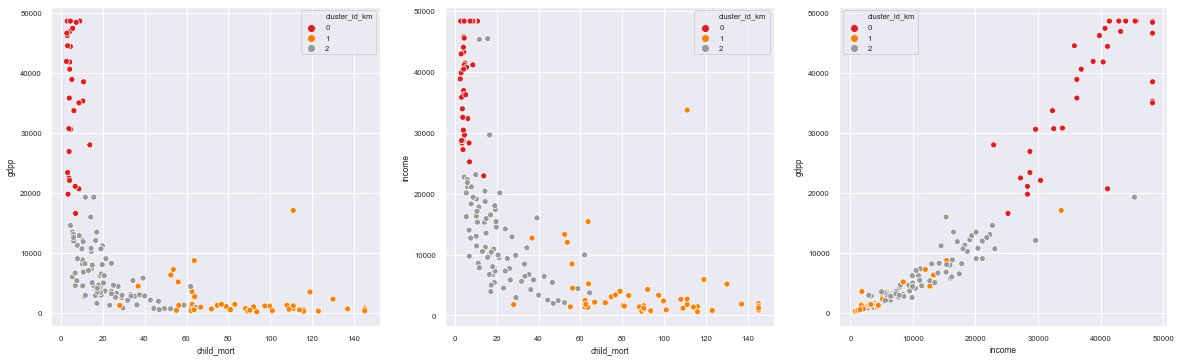

In [48]:
plt.figure(figsize=(20,20))
plt.subplot(331)
sns.scatterplot(x = "child_mort" , y = "gdpp", hue = 'cluster_id_km', data = country_df, palette = "Set1")
plt.subplot(332)
sns.scatterplot(x = "child_mort" , y = "income", hue = 'cluster_id_km', data = country_df, palette = "Set1")
plt.subplot(333)
sns.scatterplot(x = "income" , y = "gdpp", hue = 'cluster_id_km', data = country_df, palette = "Set1")
plt.show()


##### `child_mort` vs `gdpp`: <br>
Cluster 0 represents the countries with low child mortality and high gdpp. <br>
Cluster 1 represents the countries with high child mortality and low gdpp. <br>
Cluster 2 represents the countries with low child mortality and low gdpp.<br>
##### `child_mort`vs `income`:<br>
Cluster 0 represents the countries with low child mortality and high income. <br>
Cluster 1 represents the countries with high child mortality and low income. <br>
Cluster 2 represents the countries with low child mortality and low income.<br>
##### `income`vs`gdpp`:<br>
Cluster 0 represents the countries with high income and high gdpp. <br>
Cluster 1 represents the countries with low income and low gdpp. <br>
Cluster 2 represents the countries with somehwhat in between income and low gdpp.


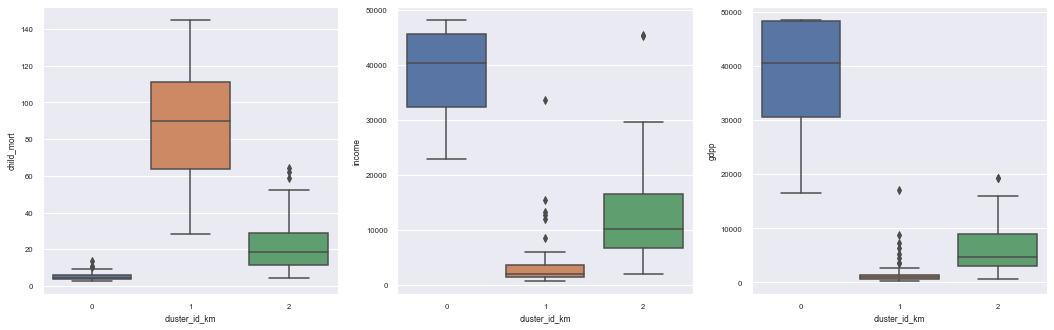

In [49]:
plt.figure(figsize = (18, 18))
feature = ['child_mort', 'income', 'gdpp']
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x='cluster_id_km', y= i[1], data=country_df)
    

Cluster 1 is the most affected cluster as depicted from the boxplots above. As it is the cluster with the highest child_mort, and least income and gdpp

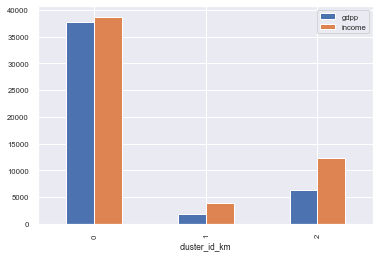

In [50]:
country_df[['gdpp', 'income', 'cluster_id_km']].groupby("cluster_id_km").mean().plot(kind = 'bar')

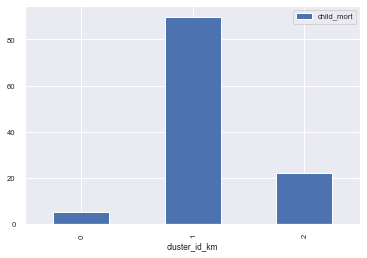

In [51]:
country_df[[ 'child_mort', 'cluster_id_km']].groupby("cluster_id_km").mean().plot(kind = 'bar')

Picking up the three attributes:: GDPP, Child_mort, Income
The needy countries will have low gdpp, high Child_mort and low Income


In [52]:
#deriving the dataframe containing the target cluster sorted acc to the requirement
help_needed_1=country_df[country_df['cluster_id_km']==1].sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True])

In [53]:
help_needed_1.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Imports,Health_expen,cluster_id_km
26,Burundi,93.60,764.0,12.30,57.70,5.861,231,20.6052,90.552,26.7960,1
88,Liberia,89.30,700.0,5.47,60.80,5.020,327,62.4570,302.802,38.5860,1
37,"Congo, Dem. Rep.",116.00,609.0,20.80,57.50,5.861,334,137.2740,165.664,26.4194,1
112,Niger,123.00,814.0,2.55,58.80,5.861,348,77.2560,170.868,17.9568,1
132,Sierra Leone,145.16,1220.0,17.20,55.78,5.200,399,67.0320,137.655,52.2690,1


# Step 8  :Hierarchical Clustering

In [54]:
country_df_scaled.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Imports,Health_expen
0,1.362987,-0.958349,0.394438,-1.819049,2.016421,-0.757362,-0.669581,-0.732729,-0.629435
1,-0.549720,-0.394006,-0.383226,0.674398,-0.880535,-0.523321,-0.542172,-0.472182,-0.473489
2,-0.271649,-0.192552,1.440750,0.699208,-0.019090,-0.498838,-0.475838,-0.560152,-0.530017
3,2.111438,-0.667360,2.190136,-1.335246,2.044904,-0.560376,-0.418960,-0.543087,-0.588935
4,-0.713443,0.227992,-0.862393,0.736424,-0.547072,0.013312,-0.027134,0.306422,-0.150685


In [55]:
country_df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Imports,Health_expen,cluster_id_km
0,Afghanistan,90.2,1610.0,9.44,56.2,5.820,553,55.30,248.297,41.9174,1
1,Albania,16.6,9930.0,4.49,76.3,1.650,4090,1145.20,1987.740,267.8950,2
2,Algeria,27.3,12900.0,16.10,76.5,2.890,4460,1712.64,1400.440,185.9820,2
3,Angola,119.0,5900.0,20.87,60.1,5.861,3530,2199.19,1514.370,100.6050,1
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.130,12200,5551.00,7185.800,735.6600,2


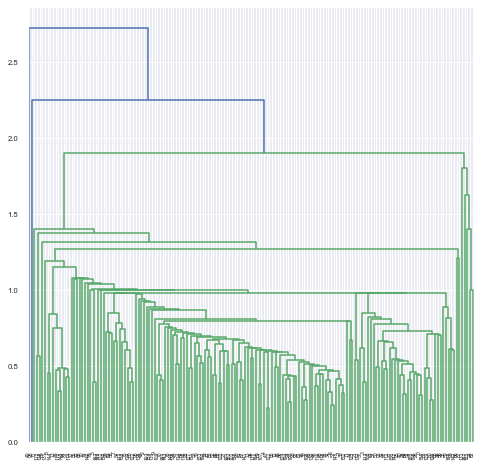

In [56]:
# single linkage
mergings = linkage(country_df_scaled, method="single", metric='euclidean')
plt.figure(figsize=(8,8))
dendrogram(mergings)
plt.show()

In [57]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
# assign cluster labels
country_df['cluster_id_singlehier'] = cluster_labels
country_df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Imports,Health_expen,cluster_id_km,cluster_id_singlehier
0,Afghanistan,90.2,1610.0,9.44,56.2,5.820,553,55.30,248.297,41.9174,1,0
1,Albania,16.6,9930.0,4.49,76.3,1.650,4090,1145.20,1987.740,267.8950,2,0
2,Algeria,27.3,12900.0,16.10,76.5,2.890,4460,1712.64,1400.440,185.9820,2,0
3,Angola,119.0,5900.0,20.87,60.1,5.861,3530,2199.19,1514.370,100.6050,1,0
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.130,12200,5551.00,7185.800,735.6600,2,0


In [59]:
country_df.cluster_id_singlehier.value_counts()

0    165
2      1
1      1
Name: cluster_id_singlehier, dtype: int64

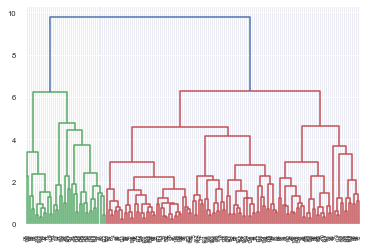

In [60]:
# complete linkage
mergings = linkage(country_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [61]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [62]:
# assign cluster labels
country_df['cluster_id_hier'] = cluster_labels
country_df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Imports,Health_expen,cluster_id_km,cluster_id_singlehier,cluster_id_hier
0,Afghanistan,90.2,1610.0,9.44,56.2,5.820,553,55.30,248.297,41.9174,1,0,0
1,Albania,16.6,9930.0,4.49,76.3,1.650,4090,1145.20,1987.740,267.8950,2,0,1
2,Algeria,27.3,12900.0,16.10,76.5,2.890,4460,1712.64,1400.440,185.9820,2,0,1
3,Angola,119.0,5900.0,20.87,60.1,5.861,3530,2199.19,1514.370,100.6050,1,0,0
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.130,12200,5551.00,7185.800,735.6600,2,0,1


In [63]:
country_df.cluster_id_hier.value_counts()

1    86
0    41
2    40
Name: cluster_id_hier, dtype: int64

Picking complete linkage as it is giving more meaningful clusters.

# Step 9 : Cluster Profiling of clusters formed through Hierarchical Clustering

In [64]:
#count of each cluster
country_df.cluster_id_hier.value_counts()

1    86
0    41
2    40
Name: cluster_id_hier, dtype: int64

In [ ]:
#scatter plot of the three features child_mort, gdpp and income
plt.figure(figsize=(20,20))
plt.subplot(331)
sns.scatterplot(x = "child_mort" , y = "gdpp", hue = 'cluster_id_hier', data = country_df, palette = "Set1")
plt.subplot(332)
sns.scatterplot(x = "child_mort" , y = "income", hue = 'cluster_id_hier', data = country_df, palette = "Set1")
plt.subplot(333)
sns.scatterplot(x = "income" , y = "gdpp", hue = 'cluster_id_hier', data = country_df, palette = "Set1")
plt.show()

In [ ]:
#boxplot of the three features w.r.t the three clusters
plt.figure(figsize = (18, 18))
feature = ['child_mort', 'income', 'gdpp']
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x='cluster_id_hier', y= i[1], data=country_df)

In [ ]:
#comparing the three features for each cluster
country_df[['gdpp', 'income', 'cluster_id_hier']].groupby("cluster_id_hier").mean().plot(kind = 'bar')

In [ ]:
country_df[['child_mort', 'cluster_id_hier']].groupby("cluster_id_hier").mean().plot(kind = 'bar')
                                    

Cluster 0 is the target cluster as it has high child_mort and the least gdpp and income

In [ ]:
#deriving the datafram containing the target cluster sorted acc to the requirement
help_needed= country_df[country_df['cluster_id_hier']==0].sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True])

In [ ]:
#Look at the cluster so formed
help_needed.head()

# Step 10. Final Analysis

#### `Five Countries that are in the need of help are as depicted by both of the algos are as follows:`<br>
Burundi<br>
Liberia <br>
Congo,Dem. Rep <br>
Niger<br>
Sierra Leone
